In [1]:
!pip install joblib

In [1]:
import os  # cheeck currently directory
import pandas as pd  # Load pandas library for data wrangling
# to convert weather station to a numeric number
from sklearn.preprocessing import LabelEncoder
# Split dataset and conduct cross-validation
from sklearn.model_selection import train_test_split, cross_val_score
# build a randomn forest model model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report
from IPython.display import display
from sklearn.preprocessing import StandardScaler  # Standardize column
# build a logisitic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  # build a decision tree model
# build a gradient boosting model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier  # build a knn model
from sklearn.svm import SVC  # Build a svm model
from sklearn.naive_bayes import GaussianNB  # build naive bayes model
from collections import Counter  # obtain counts
import matplotlib.pyplot as plt  # plot correlation matrix
import seaborn as sns  # plot feature importance
import joblib  # save model
# utilize calss weight balancing in models
from sklearn.utils.class_weight import compute_class_weight
from PIL import Image  # Import model evaluation report image
from sklearn.model_selection import GridSearchCV  # conduct hyper parameter tuning

In [ ]:
# Get the current working directory
current_directory = os.getcwd()
current_directory

# Data Exploration

In [2]:
file_path = 'Bushfire_Weather_data.xlsx'

# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)
df.head()

,Page_URL,Page_title,Date,Day,Temps_Min,Temps_Max,Rain,AM9_Temp,AM9_RH,AM9_Dir,AM9_Spd,PM3_Temp,PM3_RH,PM3_Dir,PM3_Spd,KEY
0,201401,Benalla,1,We,9.8,26.9,0.0,21.1,37,SE,7.0,25.8,31,E,4.0,20140101
1,201401,Benalla,2,Th,14.9,25.9,3.6,19.0,72,SSW,4.0,24.4,36,WNW,4.0,20140102
2,201401,Benalla,3,Fr,15.8,30.2,0.0,22.0,35,SSE,4.0,25.5,35,WNW,9.0,20140103
3,201401,Benalla,4,Sa,11.4,25.0,0.0,15.5,51,SSW,6.0,22.9,28,W,13.0,20140104
4,201401,Benalla,7,Tu,9.2,25.9,0.0,15.0,43,S,19.0,23.9,25,SSE,11.0,20140107


In [3]:
df.count()

Page_URL      20021
Page_title    20021
Date          20021
Day           20021
Temps_Min     20021
Temps_Max     20021
Rain          20021
AM9_Temp      20021
AM9_RH        20021
AM9_Dir       20015
AM9_Spd       20021
PM3_Temp      20021
PM3_RH        20021
PM3_Dir       20011
PM3_Spd       20021
KEY           20021
dtype: int64

In [4]:
file_path = 'Bushfire_Wstation_2016_2023_01.csv'

# Read the CSV file into a DataFrame with a different encoding
df2 = pd.read_csv(file_path, encoding='ISO-8859-1')

df2.head()

,FIRETYPE,SEASON,FIRE_NO,NAME,START_DATE,STRTDATIT,TREAT_TYPE,FIREKEY,DSE_ID,CFA_ID,AREA_HA,latitude,longitude,WStation,Year,Month,Day
0,BUSHFIRE,2017,32,BARANDUDA - BARANDUDA RANGE TRACK,3/2/2017,20170302,FIRE,W201734032,920720.0,NaN,0.1570,-36.246909,146.874645,ALBURY AIRPORT AWS,2017,3,2
1,BUSHFIRE,2017,32,GLENROWAN RIDGE TRACK,12/20/2016,20161220,FIRE,W201737032,917222.0,NaN,1.2163,-36.420704,146.214752,WANGARATTA AERO,2016,12,20
2,BUSHFIRE,2016,61,MT BRUNO - JONES RD,12/20/2015,20151220,FIRE,W201637061,887780.0,1552677.0,3.3494,-36.339006,146.151911,WANGARATTA AERO,2015,12,20
3,BUSHFIRE,2018,49,OVENS 49 - BEECHWORTH - WARNERS TRACK,1/23/2018,20180123,FIRE,W201834049,935865.0,NaN,0.0724,-36.270987,146.627895,RUTHERGLEN RESEARCH,2018,1,23
4,BUSHFIRE,2016,2,BAILIESTON - REEDY LAKE,8/18/2015,20150818,FIRE,W2016992,NaN,NaN,13.9893,-36.713557,145.091987,SHEPPARTON AIRPORT,2015,8,18


In [5]:
df2.count()

FIRETYPE      519
SEASON        519
FIRE_NO       516
NAME          519
START_DATE    519
STRTDATIT     519
TREAT_TYPE    519
FIREKEY       493
DSE_ID        507
CFA_ID         81
AREA_HA       519
latitude      519
longitude     519
WStation      519
Year          519
Month         519
Day           519
dtype: int64

In [6]:
# Rename Wstation
df['Page_title'].replace('Wangaratta', 'WANGARATTA', inplace=True)
df['Page_title'].replace('Benalla', 'BENALLA', inplace=True)
df['Page_title'].replace('Shepparton', 'SHEPPARTON', inplace=True)
df['Page_title'].replace('Falls Creek', 'FALLS_CREEK', inplace=True)
df['Page_title'].replace('Mount Buller', 'MOUNT_BULLER', inplace=True)
df['Page_title'].replace('Yarrawonga', 'YARRAWONGA', inplace=True)
df['Page_title'].replace('Albury', 'ALBURY', inplace=True)
df['Page_title'].replace('Corryong', 'CARRYONG', inplace=True)
df['Page_title'].replace('Edi Upper', 'EDI_UPPER', inplace=True)
df['Page_title'].replace('Hunters Hill', 'HUNTERS_HILL', inplace=True)
df['Page_title'].replace('Rutherglen', 'RUTHERGLEN', inplace=True)

In [7]:
# Rename Wstation
df2['WStation'].replace('WANGARATTA AERO', 'WANGARATTA', inplace=True)
df2['WStation'].replace('BENALLA AIRPORT', 'BENALLA', inplace=True)
df2['WStation'].replace('SHEPPARTON AIRPORT', 'SHEPPARTON', inplace=True)
df2['WStation'].replace('FALLS CREEK', 'FALLS_CREEK', inplace=True)
df2['WStation'].replace('MOUNT BULLER', 'MOUNT_BULLER', inplace=True)
df2['WStation'].replace('YARRAWONGA', 'YARRAWONGA', inplace=True)
df2['WStation'].replace('ALBURY AIRPORT AWS', 'ALBURY', inplace=True)
df2['WStation'].replace('CORRYONG AIRPORT', 'CARRYONG', inplace=True)
df2['WStation'].replace('EDI UPPER', 'EDI_UPPER', inplace=True)
df2['WStation'].replace('HUNTERS HILL', 'HUNTERS_HILL', inplace=True)
df2['WStation'].replace('RUTHERGLEN RESEARCH', 'RUTHERGLEN', inplace=True)

In [8]:
df = df.drop(['Page_URL', 'Date','Day'], axis=1)
df.rename(columns = {'Page_title':'Station_Region'}, inplace = True)
df.head()

,Station_Region,Temps_Min,Temps_Max,Rain,AM9_Temp,AM9_RH,AM9_Dir,AM9_Spd,PM3_Temp,PM3_RH,PM3_Dir,PM3_Spd,KEY
0,BENALLA,9.8,26.9,0.0,21.1,37,SE,7.0,25.8,31,E,4.0,20140101
1,BENALLA,14.9,25.9,3.6,19.0,72,SSW,4.0,24.4,36,WNW,4.0,20140102
2,BENALLA,15.8,30.2,0.0,22.0,35,SSE,4.0,25.5,35,WNW,9.0,20140103
3,BENALLA,11.4,25.0,0.0,15.5,51,SSW,6.0,22.9,28,W,13.0,20140104
4,BENALLA,9.2,25.9,0.0,15.0,43,S,19.0,23.9,25,SSE,11.0,20140107


In [9]:
# Summarizing the DataFrame 
summary_df = df2.groupby(['WStation', 'STRTDATIT']).agg(
    total_area_ha=('AREA_HA', 'sum'),
    count_of_rows=('AREA_HA', 'size')
).reset_index().sort_values(by='count_of_rows', ascending=False)

# Display the summary DataFrame
summary_df.head()

,WStation,STRTDATIT,total_area_ha,count_of_rows
168,MOUNT_BULLER,20191231,83.4484,41
57,DARTMOUTH RESERVOIR,20191121,6282.5712,31
118,FALLS_CREEK,20191231,35830.2541,21
119,FALLS_CREEK,20200101,44315.9390,14
110,FALLS_CREEK,20190228,13236.3868,14


In [10]:
df['Station_Region'].unique()

array(['BENALLA', 'WANGARATTA', 'YARRAWONGA', 'SHEPPARTON', 'FALLS_CREEK',
       'MOUNT_BULLER', 'RUTHERGLEN', 'ALBURY', 'CARRYONG', 'EDI_UPPER',
       'HUNTERS_HILL'], dtype=object)

In [11]:
summary_df['WStation'].unique()

array(['MOUNT_BULLER', 'DARTMOUTH RESERVOIR', 'FALLS_CREEK', 'EDI_UPPER',
       'CARRYONG', 'ALBURY', 'HUNTERS_HILL', 'STRATHBOGIE', 'SHEPPARTON',
       'YARRAWONGA', 'BENALLA', 'RUTHERGLEN', 'WANGARATTA'], dtype=object)

In [12]:
# Convert the `KEY` column in df to string
df['KEY'] = df['KEY'].astype(str)

# Create a new column by concatenating WStation and STRTDATIT
summary_df['JOINKEY1'] = summary_df['WStation'] + '_' + summary_df['STRTDATIT'].astype(str)
df['JOINKEY2'] = df['Station_Region'] + '_' + df['KEY']

# Left join df (weather data) with df2 (fire data) on KEY and STRTDATIT
data = df.merge(summary_df, how='left', left_on='JOINKEY2', right_on='JOINKEY1')
data.head()

,Station_Region,Temps_Min,Temps_Max,Rain,AM9_Temp,AM9_RH,AM9_Dir,AM9_Spd,PM3_Temp,PM3_RH,PM3_Dir,PM3_Spd,KEY,JOINKEY2,WStation,STRTDATIT,total_area_ha,count_of_rows,JOINKEY1
0,BENALLA,9.8,26.9,0.0,21.1,37,SE,7.0,25.8,31,E,4.0,20140101,BENALLA_20140101,NaN,NaN,NaN,NaN,NaN
1,BENALLA,14.9,25.9,3.6,19.0,72,SSW,4.0,24.4,36,WNW,4.0,20140102,BENALLA_20140102,NaN,NaN,NaN,NaN,NaN
2,BENALLA,15.8,30.2,0.0,22.0,35,SSE,4.0,25.5,35,WNW,9.0,20140103,BENALLA_20140103,NaN,NaN,NaN,NaN,NaN
3,BENALLA,11.4,25.0,0.0,15.5,51,SSW,6.0,22.9,28,W,13.0,20140104,BENALLA_20140104,NaN,NaN,NaN,NaN,NaN
4,BENALLA,9.2,25.9,0.0,15.0,43,S,19.0,23.9,25,SSE,11.0,20140107,BENALLA_20140107,NaN,NaN,NaN,NaN,NaN


In [13]:
# Create a new column based on the value of count_of_rows
data['Bushfire_Event_Target'] = data['count_of_rows'].apply(lambda x: 0 if pd.isna(x) or x == 0 else 1)
data.head()

,Station_Region,Temps_Min,Temps_Max,Rain,AM9_Temp,AM9_RH,AM9_Dir,AM9_Spd,PM3_Temp,PM3_RH,PM3_Dir,PM3_Spd,KEY,JOINKEY2,WStation,STRTDATIT,total_area_ha,count_of_rows,JOINKEY1,Bushfire_Event_Target
0,BENALLA,9.8,26.9,0.0,21.1,37,SE,7.0,25.8,31,E,4.0,20140101,BENALLA_20140101,NaN,NaN,NaN,NaN,NaN,0
1,BENALLA,14.9,25.9,3.6,19.0,72,SSW,4.0,24.4,36,WNW,4.0,20140102,BENALLA_20140102,NaN,NaN,NaN,NaN,NaN,0
2,BENALLA,15.8,30.2,0.0,22.0,35,SSE,4.0,25.5,35,WNW,9.0,20140103,BENALLA_20140103,NaN,NaN,NaN,NaN,NaN,0
3,BENALLA,11.4,25.0,0.0,15.5,51,SSW,6.0,22.9,28,W,13.0,20140104,BENALLA_20140104,NaN,NaN,NaN,NaN,NaN,0
4,BENALLA,9.2,25.9,0.0,15.0,43,S,19.0,23.9,25,SSE,11.0,20140107,BENALLA_20140107,NaN,NaN,NaN,NaN,NaN,0


In [14]:
# Remove unwanted columns from the DataFrame
data = data.drop(columns=['WStation'])
data = data.drop(columns=['STRTDATIT'])
data = data.drop(columns=['count_of_rows'])
data = data.drop(columns=['AM9_Dir'])
data = data.drop(columns=['PM3_Dir'])
data = data.drop(columns=['KEY'])
data = data.drop(columns=['JOINKEY1'])
data = data.drop(columns=['JOINKEY2'])

# Replace NaN values in the 'Total_Area' column with 0
data['total_area_ha'] = data['total_area_ha'].fillna(0)
data.rename(columns = {'total_area_ha':'Total_Area'}, inplace = True)
# Normalize the Total_Area column
data['Total_Area'] = (data['Total_Area'] - data['Total_Area'].min()) / (data['Total_Area'].max() - data['Total_Area'].min())

In [15]:
data.head()

,Station_Region,Temps_Min,Temps_Max,Rain,AM9_Temp,AM9_RH,AM9_Spd,PM3_Temp,PM3_RH,PM3_Spd,Total_Area,Bushfire_Event_Target
0,BENALLA,9.8,26.9,0.0,21.1,37,7.0,25.8,31,4.0,0.0,0
1,BENALLA,14.9,25.9,3.6,19.0,72,4.0,24.4,36,4.0,0.0,0
2,BENALLA,15.8,30.2,0.0,22.0,35,4.0,25.5,35,9.0,0.0,0
3,BENALLA,11.4,25.0,0.0,15.5,51,6.0,22.9,28,13.0,0.0,0
4,BENALLA,9.2,25.9,0.0,15.0,43,19.0,23.9,25,11.0,0.0,0


In [16]:
# Initialize the encoder
label_encoder = LabelEncoder()

# Fit and transform the data
data["Station_Region"] = label_encoder.fit_transform(data["Station_Region"])

data.head()

,Station_Region,Temps_Min,Temps_Max,Rain,AM9_Temp,AM9_RH,AM9_Spd,PM3_Temp,PM3_RH,PM3_Spd,Total_Area,Bushfire_Event_Target
0,1,9.8,26.9,0.0,21.1,37,7.0,25.8,31,4.0,0.0,0
1,1,14.9,25.9,3.6,19.0,72,4.0,24.4,36,4.0,0.0,0
2,1,15.8,30.2,0.0,22.0,35,4.0,25.5,35,9.0,0.0,0
3,1,11.4,25.0,0.0,15.5,51,6.0,22.9,28,13.0,0.0,0
4,1,9.2,25.9,0.0,15.0,43,19.0,23.9,25,11.0,0.0,0


In [17]:
# Print the mapping of original values to encoded values
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping", mapping)

Mapping {'ALBURY': 0, 'BENALLA': 1, 'CARRYONG': 2, 'EDI_UPPER': 3, 'FALLS_CREEK': 4, 'HUNTERS_HILL': 5, 'MOUNT_BULLER': 6, 'RUTHERGLEN': 7, 'SHEPPARTON': 8, 'WANGARATTA': 9, 'YARRAWONGA': 10}


array([[<Axes: title={'center': 'Station_Region'}>,
        <Axes: title={'center': 'Temps_Min'}>,
        <Axes: title={'center': 'Temps_Max'}>],
       [<Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'AM9_Temp'}>,
        <Axes: title={'center': 'AM9_RH'}>],
       [<Axes: title={'center': 'AM9_Spd'}>,
        <Axes: title={'center': 'PM3_Temp'}>,
        <Axes: title={'center': 'PM3_RH'}>],
       [<Axes: title={'center': 'PM3_Spd'}>,
        <Axes: title={'center': 'Total_Area'}>,
        <Axes: title={'center': 'Bushfire_Event_Target'}>]], dtype=object)

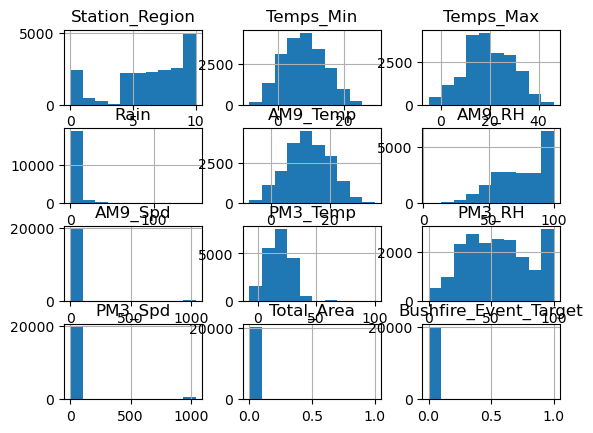

In [18]:
# Assigning the data to the DataFrame
df = pd.DataFrame(data)
df.hist()

In [ ]:
df.head()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20021 entries, 0 to 20020
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Station_Region         20021 non-null  int32  
 1   Temps_Min              20021 non-null  float64
 2   Temps_Max              20021 non-null  float64
 3   Rain                   20021 non-null  float64
 4   AM9_Temp               20021 non-null  float64
 5   AM9_RH                 20021 non-null  int64  
 6   AM9_Spd                20021 non-null  float64
 7   PM3_Temp               20021 non-null  float64
 8   PM3_RH                 20021 non-null  int64  
 9   PM3_Spd                20021 non-null  float64
 10  Total_Area             20021 non-null  float64
 11  Bushfire_Event_Target  20021 non-null  int64  
dtypes: float64(8), int32(1), int64(3)
memory usage: 1.8 MB


# Resolving Class Imbalance Issues

In [20]:
# Separate the majority and minority classes
X_0 = df[df['Bushfire_Event_Target'] == 0]  # Majority class
X_1 = df[df['Bushfire_Event_Target'] == 1]  # Minority class

# Randomly sample from the majority class
n_samples = 200  # Number of samples to keep from the majority class
X_0_sampled = X_0.sample(n=n_samples, random_state=42)

# Combine the undersampled majority class with the minority class
df = pd.concat([X_0_sampled, X_1])

In [21]:
a = df[df['Bushfire_Event_Target'] == 0]
a.count()

Station_Region           200
Temps_Min                200
Temps_Max                200
Rain                     200
AM9_Temp                 200
AM9_RH                   200
AM9_Spd                  200
PM3_Temp                 200
PM3_RH                   200
PM3_Spd                  200
Total_Area               200
Bushfire_Event_Target    200
dtype: int64

In [22]:
a = df[df['Bushfire_Event_Target'] == 1]
a.count()

Station_Region           140
Temps_Min                140
Temps_Max                140
Rain                     140
AM9_Temp                 140
AM9_RH                   140
AM9_Spd                  140
PM3_Temp                 140
PM3_RH                   140
PM3_Spd                  140
Total_Area               140
Bushfire_Event_Target    140
dtype: int64

# Check for correlation among the variables

                       Station_Region  Temps_Min  Temps_Max      Rain  \
Station_Region               1.000000   0.056108   0.102297 -0.044611   
Temps_Min                    0.056108   1.000000   0.817511 -0.049770   
Temps_Max                    0.102297   0.817511   1.000000 -0.185224   
Rain                        -0.044611  -0.049770  -0.185224  1.000000   
AM9_Temp                     0.103578   0.900393   0.951034 -0.136218   
AM9_RH                      -0.033659  -0.540743  -0.639255  0.220045   
AM9_Spd                     -0.221265  -0.060050  -0.053351  0.076960   
PM3_Temp                     0.022910   0.729600   0.907651 -0.160921   
PM3_RH                      -0.052221  -0.520047  -0.808371  0.215631   
PM3_Spd                     -0.232512  -0.063154  -0.022239  0.051807   
Total_Area                  -0.045184   0.024080  -0.001396 -0.020690   
Bushfire_Event_Target       -0.040034   0.374604   0.330619 -0.084738   

                       AM9_Temp    AM9_RH   AM9_Sp

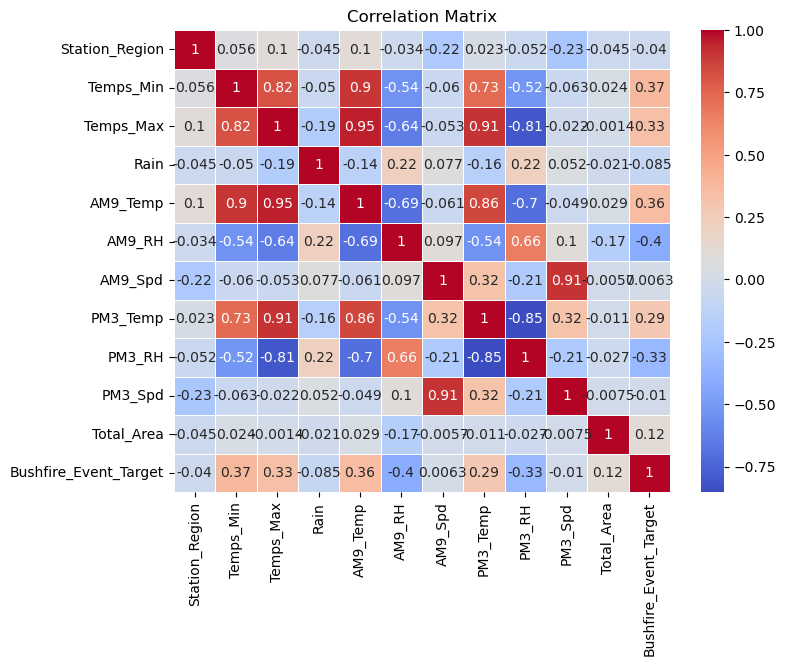

In [23]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Write DataFrame to CSV
csv_file_path = 'BB_R_Model_Data.csv'  # Specify the path to the output CSV file
df.to_csv(csv_file_path, index=False)  # Set index=False to avoid writing row indices to the file

In [26]:
features = ['Station_Region','Temps_Min','Temps_Max','Rain','AM9_Temp','AM9_RH','AM9_Spd','PM3_Temp','PM3_RH','PM3_Spd']
#features = ['Station_Region','Temps_Min','Temps_Max','Rain','AM9_RH','AM9_Spd']
X = df.loc[:, features]
y = df.loc[:, ['Bushfire_Event_Target']]

# Perform stratified split to preserve the class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Check the distribution of target variable in training and test sets
print("Train set class distribution:\n", y_train.value_counts())
print("Test set class distribution:\n", y_test.value_counts())

Train set class distribution:
 Bushfire_Event_Target
0                        160
1                        112
Name: count, dtype: int64
Test set class distribution:
 Bushfire_Event_Target
0                        40
1                        28
Name: count, dtype: int64


In [27]:
X_train.head()

,Station_Region,Temps_Min,Temps_Max,Rain,AM9_Temp,AM9_RH,AM9_Spd,PM3_Temp,PM3_RH,PM3_Spd
11223,6,14.5,18.5,0.4,15.9,62,28.0,15.0,83,31.0
2818,9,10.7,32.1,0.0,20.9,50,4.0,31.1,19,11.0
9194,4,18.0,22.6,0.0,19.3,37,24.0,22.3,37,28.0
13072,7,16.5,21.6,0.0,17.4,48,35.0,20.1,20,28.0
6862,8,8.4,27.5,0.0,16.6,58,9.0,26.1,26,19.0


In [28]:
X_test.head()

,Station_Region,Temps_Min,Temps_Max,Rain,AM9_Temp,AM9_RH,AM9_Spd,PM3_Temp,PM3_RH,PM3_Spd
13265,7,3.8,17.8,0.0,11.0,99,15.0,17.0,65,11.0
16594,0,16.3,31.2,1.2,20.1,75,4.0,30.8,27,9.0
4151,10,9.8,28.3,0.0,17.3,70,9.0,27.3,26,9.0
7502,8,9.9,25.3,0.0,18.2,63,7.0,23.6,39,19.0
13081,7,10.8,34.7,0.0,25.7,31,15.0,33.5,16,6.0


In [29]:
y_train.head()

,Bushfire_Event_Target
11223,1
2818,0
9194,0
13072,1
6862,1


In [30]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 13265 to 7492
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Station_Region  68 non-null     int32  
 1   Temps_Min       68 non-null     float64
 2   Temps_Max       68 non-null     float64
 3   Rain            68 non-null     float64
 4   AM9_Temp        68 non-null     float64
 5   AM9_RH          68 non-null     int64  
 6   AM9_Spd         68 non-null     float64
 7   PM3_Temp        68 non-null     float64
 8   PM3_RH          68 non-null     int64  
 9   PM3_Spd         68 non-null     float64
dtypes: float64(7), int32(1), int64(2)
memory usage: 5.6 KB


# Randomn Forest Classifier

In [31]:
# Initialize RandomForestClassifier with class_weight="balanced"
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

In [32]:
# Perform cross-validation
cv_scores = cross_val_score(rf, X_train, y_train.values.ravel(), cv=5)
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.74545455 0.63636364 0.68518519 0.66666667 0.72222222]


In [33]:
rf.fit(X_train, y_train)

C:\Users\Thinithi\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [34]:
# Make predictions
y_pred = rf.predict(X_test)

In [35]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print precision, recall, and F1 score
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6323529411764706
Confusion Matrix:
 [[30 10]
 [15 13]]
Precision: 0.5652173913043478
Recall: 0.4642857142857143
F1 Score: 0.5098039215686274


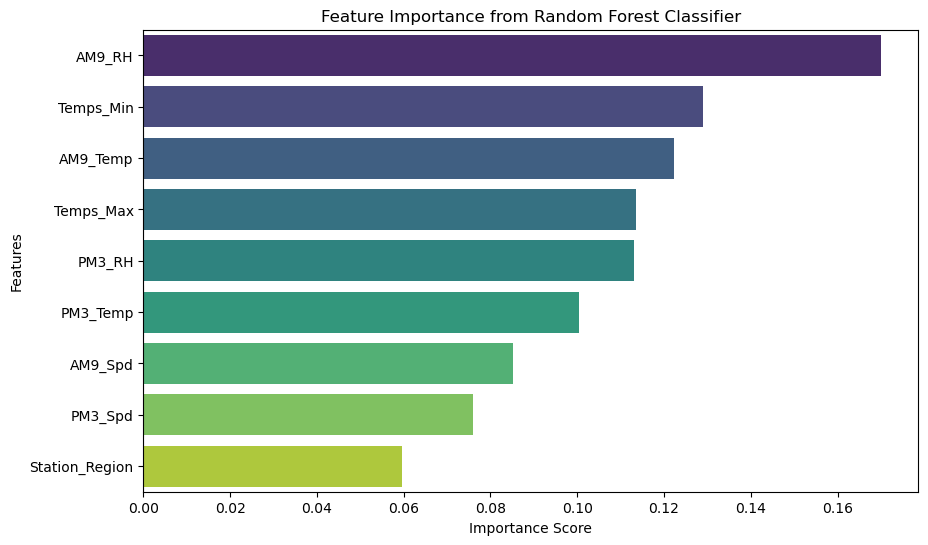

In [36]:
# Get feature importances
feature_importances = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance'])
feature_importances['abs_importance'] = feature_importances['importance'].abs()

# Filter feature importances based on absolute value
feature_filtered = feature_importances[feature_importances['abs_importance'] > 0.05].sort_values(by='abs_importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_filtered['importance'], y=feature_filtered.index, palette='viridis')
plt.title('Feature Importance from Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.axvline(0, color='grey', linestyle='--')  # Add a vertical line at x=0
plt.show()

# Dimensionality Reduction

In [37]:
features = ['Station_Region','Temps_Min','Temps_Max','Rain','AM9_RH','AM9_Spd','PM3_RH']
X = df.loc[:, features]
y = df.loc[:, ['Bushfire_Event_Target']]

# Perform stratified split to preserve the class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0, stratify=y)

# Check the distribution of target variable in training and test sets
print("Train set class distribution:\n", y_train.value_counts())
print("Test set class distribution:\n", y_test.value_counts())

Train set class distribution:
 Bushfire_Event_Target
0                        160
1                        112
Name: count, dtype: int64
Test set class distribution:
 Bushfire_Event_Target
0                        40
1                        28
Name: count, dtype: int64


In [38]:
# Initialize RandomForestClassifier with class_weight="balanced"
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

In [39]:
# Perform cross-validation
cv_scores = cross_val_score(rf, X_train, y_train.values.ravel(), cv=5)
print("Cross-validation scores:", cv_scores)

Cross-validation scores: [0.70909091 0.58181818 0.72222222 0.72222222 0.7962963 ]


In [40]:
rf.fit(X_train, y_train)

C:\Users\Thinithi\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [41]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print precision, recall, and F1 score
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6323529411764706
Confusion Matrix:
 [[30 10]
 [15 13]]
Precision: 0.5652173913043478
Recall: 0.4642857142857143
F1 Score: 0.5098039215686274


Dimesionality Reduced but the model performance is kept near the same level. By removing AM9_Temp majority of the model performance (F1 Score) increased as well. 

# Lositic regression with probability

In [784]:
# Feature scaling (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [785]:
# Create a logistic regression model with class weights
log_reg = LogisticRegression(random_state=0, class_weight='balanced')

# Perform cross-validation
cv_scores = cross_val_score(log_reg, X_train, y_train.values.ravel(), cv=5)
print("Cross-validation scores:", cv_scores)

# Train the model
log_reg.fit(X_train_scaled, y_train)

Cross-validation scores: [0.63636364 0.61818182 0.75925926 0.62962963 0.66666667]


C:\Users\Thinithi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Thinithi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

LogisticRegression(class_weight='balanced', random_state=0)

In [786]:
# Make predictions
y_pred = log_reg.predict(X_test_scaled)

In [787]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print precision, recall, and F1 score
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6470588235294118
Confusion Matrix:
 [[27 13]
 [11 17]]
Precision: 0.5666666666666667
Recall: 0.6071428571428571
F1 Score: 0.5862068965517241


In [788]:
# Make predictions with probabilities
y_pred_proba = log_reg.predict_proba(X_test_scaled)

# Create a DataFrame to display test data with predicted probabilities
test_data_with_proba = pd.DataFrame(X_test, columns=features)
test_data_with_proba['Predicted_Class'] = log_reg.predict(X_test_scaled)
test_data_with_proba['Probability_Class_0'] = y_pred_proba[:, 0]
test_data_with_proba['Probability_Class_1'] = y_pred_proba[:, 1]

# Display the first few rows of the test data with probabilities
print(test_data_with_proba.head())

       Station_Region  Temps_Min  Temps_Max  Rain  AM9_RH  AM9_Spd  PM3_RH  \
13265               7        3.8       17.8   0.0      99     15.0      65   
16594               0       16.3       31.2   1.2      75      4.0      27   
4151               10        9.8       28.3   0.0      70      9.0      26   
7502                8        9.9       25.3   0.0      63      7.0      39   
13081               7       10.8       34.7   0.0      31     15.0      16   

       Predicted_Class  Probability_Class_0  Probability_Class_1  
13265                0             0.882791             0.117209  
16594                1             0.312355             0.687645  
4151                 0             0.600457             0.399543  
7502                 0             0.515639             0.484361  
13081                1             0.290802             0.709198  


# Decision Tree Classifier

In [789]:
tree_clf = DecisionTreeClassifier(random_state=0, class_weight='balanced')

# Perform cross-validation
cv_scores = cross_val_score(tree_clf, X_train, y_train.values.ravel(), cv=5)
print("Cross-validation scores:", cv_scores)

tree_clf.fit(X_train, y_train)

Cross-validation scores: [0.6        0.63636364 0.66666667 0.66666667 0.68518519]


DecisionTreeClassifier(class_weight='balanced', random_state=0)

In [790]:
# Make predictions
y_pred = tree_clf.predict(X_test)

In [791]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print precision, recall, and F1 score
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.5735294117647058
Confusion Matrix:
 [[30 10]
 [19  9]]
Precision: 0.47368421052631576
Recall: 0.32142857142857145
F1 Score: 0.3829787234042553


# Gradient Boosting Classifier

In [792]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(random_state=0)

# Perform cross-validation
cv_scores = cross_val_score(gb_clf, X_train, y_train.values.ravel(), cv=5)
print("Cross-validation scores:", cv_scores)

gb_clf.fit(X_train, y_train)

Cross-validation scores: [0.65454545 0.61818182 0.68518519 0.72222222 0.75925926]


C:\Users\Thinithi\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(random_state=0)

In [ ]:
# Make predictions
y_pred = gb_clf.predict(X_test)

In [793]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print precision, recall, and F1 score
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.5735294117647058
Confusion Matrix:
 [[30 10]
 [19  9]]
Precision: 0.47368421052631576
Recall: 0.32142857142857145
F1 Score: 0.3829787234042553


#  Support Vector Machine (SVM)

In [42]:
svc_clf = SVC(random_state=0, class_weight='balanced', probability=True)

# Perform cross-validation
cv_scores = cross_val_score(svc_clf, X_train, y_train.values.ravel(), cv=5)
print("Cross-validation scores:", cv_scores)

svc_clf.fit(X_train, y_train)

Cross-validation scores: [0.69090909 0.58181818 0.7962963  0.62962963 0.62962963]


C:\Users\Thinithi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(class_weight='balanced', probability=True, random_state=0)

In [43]:
X_train.head(10)

,Station_Region,Temps_Min,Temps_Max,Rain,AM9_RH,AM9_Spd,PM3_RH
11223,6,14.5,18.5,0.4,62,28.0,83
2818,9,10.7,32.1,0.0,50,4.0,19
9194,4,18.0,22.6,0.0,37,24.0,37
13072,7,16.5,21.6,0.0,48,35.0,20
6862,8,8.4,27.5,0.0,58,9.0,26
3506,10,14.9,31.8,0.0,66,11.0,34
18317,5,18.0,30.6,0.0,48,7.0,29
17250,0,7.8,23.7,0.0,80,1032.1,2
10468,6,-1.3,7.3,14.6,100,20.0,83
19275,5,9.2,20.7,0.2,61,6.0,61


In [44]:
# Make predictions
y_pred = svc_clf.predict(X_test)

In [45]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print precision, recall, and F1 score
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6764705882352942
Confusion Matrix:
 [[23 17]
 [ 5 23]]
Precision: 0.575
Recall: 0.8214285714285714
F1 Score: 0.676470588235294


In [46]:
# Get model parameters
model_params = svc_clf.get_params()
print("Model parameters:", model_params)

Model parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': 'balanced', 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': True, 'random_state': 0, 'shrinking': True, 'tol': 0.001, 'verbose': False}


#  k-Nearest Neighbors (k-NN)

In [797]:
knn_clf = KNeighborsClassifier()

# Perform cross-validation
cv_scores = cross_val_score(knn_clf, X_train, y_train.values.ravel(), cv=5)
print("Cross-validation scores:", cv_scores)

knn_clf.fit(X_train, y_train)

Cross-validation scores: [0.63636364 0.6        0.68518519 0.68518519 0.72222222]


C:\Users\Thinithi\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [798]:
# Make predictions
y_pred = knn_clf.predict(X_test)

In [799]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print precision, recall, and F1 score
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6029411764705882
Confusion Matrix:
 [[30 10]
 [17 11]]
Precision: 0.5238095238095238
Recall: 0.39285714285714285
F1 Score: 0.4489795918367347


# Naive Bayes

In [800]:
nb_clf = GaussianNB()

# Perform cross-validation
cv_scores = cross_val_score(nb_clf, X_train, y_train.values.ravel(), cv=5)
print("Cross-validation scores:", cv_scores)

nb_clf.fit(X_train, y_train)

Cross-validation scores: [0.63636364 0.61818182 0.75925926 0.59259259 0.57407407]


C:\Users\Thinithi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [801]:
# Make predictions
y_pred = nb_clf.predict(X_test)

In [802]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print precision, recall, and F1 score
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6470588235294118
Confusion Matrix:
 [[22 18]
 [ 6 22]]
Precision: 0.55
Recall: 0.7857142857142857
F1 Score: 0.6470588235294117


# Neural Network

In [803]:
! 

In [804]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score

In [805]:
# Reshape input for RNN (samples, time_steps, features)
# Assuming time_steps = 1 for non-sequential data, you can adjust if your data is sequential
X_train_rnn = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_rnn = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

In [806]:
# Build the RNN model
model = Sequential()

In [807]:
# Add LSTM layer
model.add(LSTM(50, activation='relu', input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))

C:\Users\Thinithi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [808]:
# Add a dropout layer to prevent overfitting
model.add(Dropout(0.2))

In [809]:
# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

In [810]:
# Compile the model with optimizer, loss function, and evaluation metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [811]:
# Train the model with training data
model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5214 - loss: 0.6869 - val_accuracy: 0.6429 - val_loss: 0.6811
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6366 - loss: 0.6773 - val_accuracy: 0.7500 - val_loss: 0.6724
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6752 - loss: 0.6676 - val_accuracy: 0.6786 - val_loss: 0.6638
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6333 - loss: 0.6686 - val_accuracy: 0.6786 - val_loss: 0.6557
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6919 - loss: 0.6541 - val_accuracy: 0.6786 - val_loss: 0.6478
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7223 - loss: 0.6364 - val_accuracy: 0.6786 - val_loss: 0.6399
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6617 - loss: 0.6414 - val_accuracy: 0.6786 - val_loss: 0.6323
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6756 - loss: 0.6261 - val_accuracy: 0.6786 - val_loss: 0.6238
Epoch 9

In [812]:
# Make predictions on the test set
y_pred_prob = model.predict(X_test_rnn)
y_pred = (y_pred_prob > 0.5).astype("int32")  # Convert probabilities to 0 or 1

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [813]:
# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print precision, recall, and F1 score
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6176470588235294
Precision: 0.5454545454545454
Recall: 0.42857142857142855
F1 Score: 0.4799999999999999


# Model Evaluation

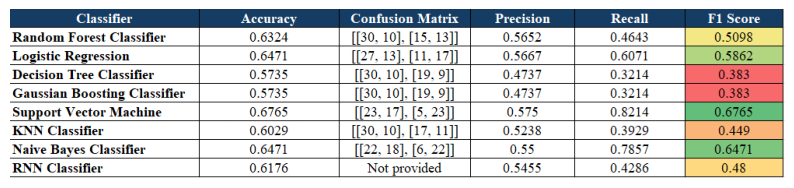

In [817]:
# Load the image
img = Image.open("Model Evaluation.png")  # replace with your image path

# Create a larger figure
plt.figure(figsize=(10, 10))

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
# Save the model
joblib.dump(svc_clf, 'BB_svm_model.pkl')

In [6]:
# Load the model
loaded_model = joblib.load('BB_svm_model.pkl')

In [7]:
X_test = [9,10.7,32.1,0.0,23,4.0,15]

# Reshape it to a 2D array
X_test = np.array(X_test).reshape(1, -1)

# Use the loaded model to make predictions
y_pred = loaded_model.predict(X_test)
print(y_pred)

[1]


C:\Users\Thinithi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [11]:
# Get probability estimates
probabilities = loaded_model.predict_proba(X_test)
print("Probabilities:", probabilities)
print(probabilities[:,1])

Probabilities: [[0.29005412 0.70994588]]
[0.70994588]


C:\Users\Thinithi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [12]:
X_test = [5,9.2,20.7,0.2,61,6.0,61]

# Reshape it to a 2D array
X_test = np.array(X_test).reshape(1, -1)

# Use the loaded model to make predictions
y_pred = loaded_model.predict(X_test)
print(y_pred)

[0]


C:\Users\Thinithi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [14]:
# Get probability estimates
probabilities = loaded_model.predict_proba(X_test)
print("Probabilities:", probabilities)
print(probabilities[:,0])

Probabilities: [[0.63029646 0.36970354]]
[0.63029646]


C:\Users\Thinithi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Hyper Parameter Tuning

In [43]:
# Define the parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],  # Kernel coefficient
    'kernel': ['rbf', 'linear'],  # Types of kernel
    'degree': [2, 3, 4]  # Degree for polynomial kernel
}

In [44]:
# Initialize the SVC classifier
svc_clf = SVC(class_weight='balanced', probability=True, random_state=0)

In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svc_clf, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train.values.ravel())

# Retrieve the best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
